In [1]:
pip install dwave-ocean-sdk
# Install the D-wave Ocean package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.6/305.6 kB 37.4 MB/s eta 0:00:00


In [2]:
pip install networkx

In [3]:
!dwave setup
#This creates a configuration file
#This is to create the default configuration file
# IF we need to access the solvers in Leap we need the token

Optionally install non-open-source packages and configure your environment.

Do you want to select non-open-source packages to install (y/n)? [y]: 

D-Wave Problem Inspector
This tool visualizes problems submitted to the quantum computer and the results returned.
This package is available under the D-Wave EULA license.
The terms of the license are available online: https://docs.ocean.dwavesys.com/eula
Install (y/n)? [y]: 
Installing: D-Wave Problem Inspector



D-Wave Drivers
These drivers enable some automated performance-tuning features.
This package is available under the D-Wave EULA license.
The terms of the license are available online: https://docs.ocean.dwavesys.com/eula
Install (y/n)? [y]: Installing: D-Wave Drivers

Creating the D-Wave configuration file.

Using the simplified configuration flow.
Try 'dwave config create --full' for more options.

Creating new configuration file: /root/.config/dwave/dwave.conf
Updating existing profile: defaults
Solver API token [skip]: Config

In [4]:
from dimod import Binary, ExactSolver # allows to create BQMs and invoque solvers
from networkx import Graph, draw
from dwave.samplers import SimulatedAnnealingSampler, SteepestDescentSolver # load the solver to be used
from dwave.system import DWaveSampler, EmbeddingComposite # use real D-wave machines, EmbeddingComposite maps the BQM to the topology

Constrcut the QUBO

In [8]:
def obtener_QUBO(G):
  nvars = len(G.nodes)
  var = [Binary(f'v{i}') for i in range (0,nvars)] # The class Binary Allows constructing a binary quadratic model of a signel variable
  qubo = -sum([(var[i]-var[j])**2 for i,j in G.edges()]) # Here Francis uses Grovers formulation and not his own for all edges (x_i - x_j)^2!
  # we add a minus because the quantum annealers always minimise
  print(qubo)
  return qubo;

In [24]:
# sampler is the method to be used to solve the problem
# it is called sample beause we are sampling considering the stochastic nature of the solvers
def obtener_sampler():
  #return ExactSolver();
  #return SimulatedAnnealingSampler()
  #return SteepestDescentSolver()
  return EmbeddingComposite(DWaveSampler()) # we call emebedding because it will be executed on the real Dwave machine with a topology

Create an instance

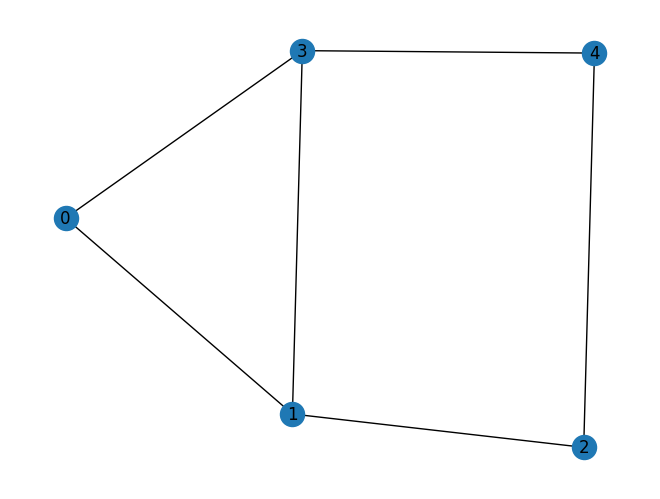

In [12]:
G = Graph()
G.add_nodes_from([0,1,2,3,4]) # passes the nodes id
G.add_edges_from([(0,1),(0,3),(1,2),(1,3),(2,4),(3,4)]) # passes the adjacency matrix
draw(G,with_labels=True)

In [14]:
# create the QUBO corresponding to this graph
qubo = obtener_QUBO(G)
# in the display:
# the first {} corresponds to the linear terms
# the second {} corresponds to the quadratic terms
# the last I suppose is the constant

BinaryQuadraticModel({'v0': -2.0, 'v1': -3.0, 'v3': -3.0, 'v2': -2.0, 'v4': -2.0}, {('v1', 'v0'): 2.0, ('v3', 'v0'): 2.0, ('v3', 'v1'): 2.0, ('v2', 'v1'): 2.0, ('v4', 'v3'): 2.0, ('v4', 'v2'): 2.0}, -0.0, 'BINARY')


In [16]:
# obtain a solve
sampler = obtener_sampler()
resultado = sampler.sample(qubo, num_reads = 10) # I suppose sample is the method that allows to optimise the solver
# num_reads is not considered because the exact solver will iterate over all the solutions
# look at the solutions returned, it does not stop at 1à iterations it returns all the 2^5 possible combinations (solutions)
print(resultado)

   v0 v1 v2 v3 v4 energy num_oc.
8   0  0  1  1  0   -5.0       1
9   1  0  1  1  0   -5.0       1
28  0  1  0  0  1   -5.0       1
29  1  1  0  0  1   -5.0       1
4   0  1  0  1  0   -4.0       1
11  0  1  1  1  0   -4.0       1
14  1  0  1  0  0   -4.0       1
17  1  0  1  0  1   -4.0       1
27  0  1  0  1  1   -4.0       1
30  1  0  0  0  1   -4.0       1
2   1  1  0  0  0   -3.0       1
3   0  1  0  0  0   -3.0       1
6   1  0  0  1  0   -3.0       1
7   0  0  0  1  0   -3.0       1
12  0  1  1  0  0   -3.0       1
13  1  1  1  0  0   -3.0       1
18  1  1  1  0  1   -3.0       1
19  0  1  1  0  1   -3.0       1
22  1  0  1  1  1   -3.0       1
23  0  0  1  1  1   -3.0       1
24  0  0  0  1  1   -3.0       1
25  1  0  0  1  1   -3.0       1
1   1  0  0  0  0   -2.0       1
5   1  1  0  1  0   -2.0       1
10  1  1  1  1  0   -2.0       1
15  0  0  1  0  0   -2.0       1
16  0  0  1  0  1   -2.0       1
20  0  1  1  1  1   -2.0       1
26  1  1  0  1  1   -2.0       1
31  0  0  

<ipython-input-16-7fe6cb3f8303>:3: SamplerUnknownArgWarning: Ignoring unknown kwarg: 'num_reads'
  resultado = sampler.sample(qubo, num_reads = 10) # I suppose sample is the method that allows to optimise the solver


Above the optimal solutions are those that have the lowest energy Level -5.0. In our example they are 4: \\


   v0 v1 v2 v3 v4 energy num_oc. \\
8   0  0  1  1  0   -5.0       1  \\
9   1  0  1  1  0   -5.0       1 \\
28  0  1  0  0  1   -5.0       1 \\
29  1  1  0  0  1   -5.0       1 \\

Testing the simulated annealing

In [19]:
# obtain a solve
sampler = obtener_sampler()
resultado = sampler.sample(qubo, num_reads = 10) # I suppose sample is the method that allows to optimise the solver
# num_reads is considered here! Look the number of solutions produced
print(resultado)

  v0 v1 v2 v3 v4 energy num_oc.
0  1  1  0  0  1   -5.0       1
1  0  1  0  0  1   -5.0       1
2  0  1  0  0  1   -5.0       1
3  0  0  1  1  0   -5.0       1
4  0  1  0  0  1   -5.0       1
5  0  0  1  1  0   -5.0       1
6  0  1  0  0  1   -5.0       1
7  1  0  1  1  0   -5.0       1
8  1  0  1  1  0   -5.0       1
9  1  1  0  0  1   -5.0       1
['BINARY', 10 rows, 10 samples, 5 variables]


Using the Steepest Decent

In [22]:
# obtain a solve
sampler = obtener_sampler()
resultado = sampler.sample(qubo, num_reads = 10) # I suppose sample is the method that allows to optimise the solver
# num_reads is considered here! Look the number of solutions produced
print(resultado)

  v0 v1 v2 v3 v4 energy num_oc. num_st.
1  0  1  0  0  1   -5.0       1       2
2  0  1  0  0  1   -5.0       1       1
3  0  1  0  0  1   -5.0       1       2
4  1  0  1  1  0   -5.0       1       0
5  1  1  0  0  1   -5.0       1       1
6  1  0  1  1  0   -5.0       1       2
8  1  1  0  0  1   -5.0       1       2
9  0  0  1  1  0   -5.0       1       0
0  0  1  0  1  0   -4.0       1       1
7  1  0  1  0  1   -4.0       1       1
['BINARY', 10 rows, 10 samples, 5 variables]


Testing with a Quantum Annealer ! Real One Baby! Yuuuhuuu !

In [25]:
!dwave config create # this allows us to change the configuration file to include our API

Using the simplified configuration flow.
Try 'dwave config create --full' for more options.

Updating existing configuration file: /root/.config/dwave/dwave.conf
Available profiles: defaults
Updating existing profile: defaults
Solver API token [skip]: DEV-aa23cb8c2e25ef3a3f06a4c6248849dcbfc84cf4
Configuration saved.


In [26]:
# obtain a solve
sampler = obtener_sampler()
resultado = sampler.sample(qubo, num_reads = 10) # I suppose sample is the method that allows to optimise the solver
# num_reads is considered here! Look the number of solutions produced
print(resultado)

  v0 v1 v2 v3 v4 energy num_oc. chain_.
0  1  0  1  1  0   -5.0       4     0.0
1  0  1  0  0  1   -5.0       1     0.0
2  0  0  1  1  0   -5.0       1     0.0
3  1  1  0  0  1   -5.0       4     0.0
['BINARY', 4 rows, 10 samples, 5 variables]


This code has some delay because it needs to connect to the platform.

Interpreting the results:

- All the solutions are optimal
- energy is the fitness value
- num_oc. is the number of times it has been sampled
- We can see that if we sum the number of occurences it sums up to 9.
